In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [69]:
mydata = pd.read_excel('/content/sample_data/condo-03.xlsx')
mydata.head(10)

,AREA,BEDROOM,BATHROOM,SIZE,FLOOR,BTS,MRT,SELL_PRICE
0,rama9,2,2,101.0,12,n,y,10500000
1,rama9,3,3,103.0,17,n,y,10900000
2,rama9,1,1,63.6,7,n,y,5490000
3,rama9,1,1,22.0,20,y,y,3300000
4,rama9,1,1,31.0,20,n,y,3800000
5,rama9,1,1,26.0,5,n,n,4080000
6,rama9,1,1,32.0,36,n,y,5300000
7,rama9,1,1,31.0,22,n,y,3800000
8,rama9,1,1,35.0,20,n,y,5400000
9,rama9,2,2,58.0,30,n,y,9740000


In [70]:
mydata.describe()

,BEDROOM,BATHROOM,SIZE,FLOOR,SELL_PRICE
count,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,1.577778,1.544444,63.302444,16.655556,1.362064e+07
std,0.718578,0.638839,50.530858,12.058995,2.761265e+07
min,1.000000,1.000000,22.000000,1.000000,9.900000e+05
25%,1.000000,1.000000,31.700000,7.000000,3.570000e+06
50%,1.000000,1.000000,47.800000,14.000000,6.850000e+06
75%,2.000000,2.000000,72.750000,22.750000,1.237500e+07
max,4.000000,3.000000,345.200000,62.000000,2.290000e+08


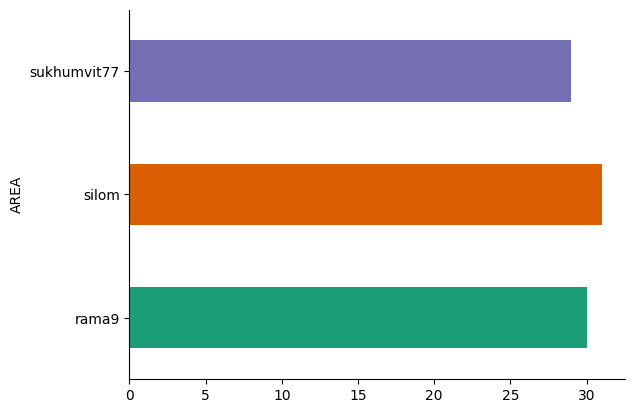

In [71]:
# @title AREA

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('AREA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

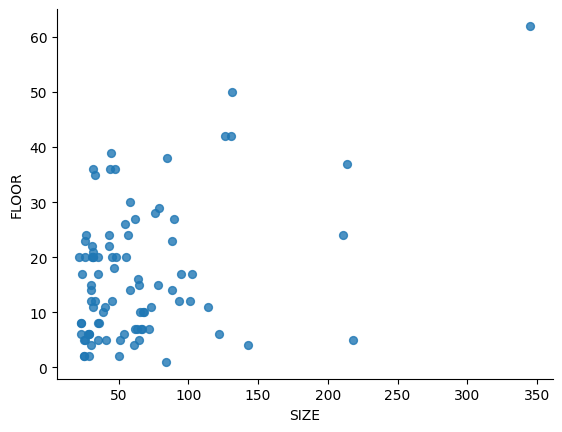

In [72]:
# @title SIZE vs FLOOR

from matplotlib import pyplot as plt
mydata.plot(kind='scatter', x='SIZE', y='FLOOR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [73]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREA        90 non-null     object 
 1   BEDROOM     90 non-null     int64  
 2   BATHROOM    90 non-null     int64  
 3   SIZE        90 non-null     float64
 4   FLOOR       90 non-null     int64  
 5   BTS         90 non-null     object 
 6   MRT         90 non-null     object 
 7   SELL_PRICE  90 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.8+ KB


In [74]:
isObject=[name for name in mydata.columns if mydata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(isObject):
  mydata[i]=le.fit_transform(mydata[i])
for x in isObject:
  print(x," = ",mydata[x].unique())


AREA  =  [0 1 2]
BTS  =  [0 1]
MRT  =  [1 0]


In [75]:
mydata.head(10)

,AREA,BEDROOM,BATHROOM,SIZE,FLOOR,BTS,MRT,SELL_PRICE
0,0,2,2,101.0,12,0,1,10500000
1,0,3,3,103.0,17,0,1,10900000
2,0,1,1,63.6,7,0,1,5490000
3,0,1,1,22.0,20,1,1,3300000
4,0,1,1,31.0,20,0,1,3800000
5,0,1,1,26.0,5,0,0,4080000
6,0,1,1,32.0,36,0,1,5300000
7,0,1,1,31.0,22,0,1,3800000
8,0,1,1,35.0,20,0,1,5400000
9,0,2,2,58.0,30,0,1,9740000


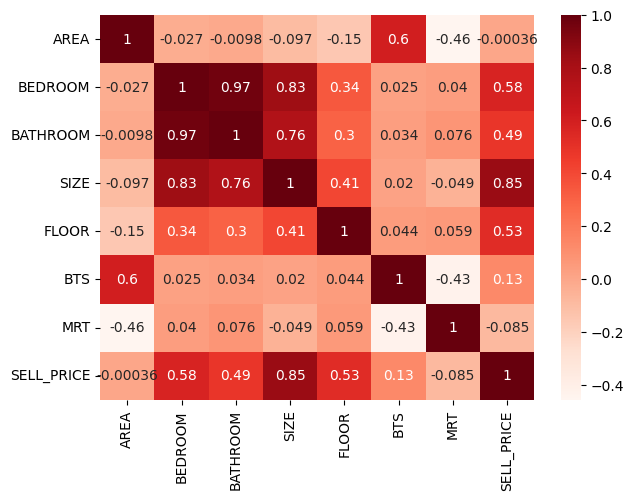

In [76]:
%matplotlib inline
plt.figure(figsize=(7,5))
cor = mydata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
corr_price=cor["SELL_PRICE"].sort_values(ascending=False)
print(corr_price)

SELL_PRICE    1.000000
SIZE          0.847275
BEDROOM       0.576384
FLOOR         0.532892
BATHROOM      0.486580
BTS           0.129338
AREA         -0.000365
MRT          -0.085424
Name: SELL_PRICE, dtype: float64


In [78]:
from sklearn.linear_model import LinearRegression

x = mydata[['SIZE','BEDROOM','FLOOR']]
y = mydata['SELL_PRICE']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3,random_state=0)
mymodelLR= LinearRegression()
mymodelLR.fit(x_train,y_train)

LinearRegression()

In [79]:
coeff1 = pd.DataFrame(mymodelLR.coef_, x.columns, columns=['Coefficient'])
coeff1

,Coefficient
SIZE,4.336291e+05
BEDROOM,-1.136897e+07
FLOOR,3.502551e+05


In [80]:
y_predicted =  mymodelLR.predict(x_test)
y_predicted
y_test
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_predicted]})
print(df)

                                              Actual  \
0  2       5490000
13      4650000
53      540000...   

                                           Predicted  
0  [16099010.489107477, 3797352.4477843232, 25518...  


In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = mean_squared_error(y_test, y_predicted)
print('Evaluation Result :\n--------------------------------')
print('The intercept is:', mymodelLR.intercept_)
print('The coefficient is:' , mymodelLR.coef_)
print('The rmse is:',rmse)
print('The r2_score is:',r2_score)

Evaluation Result :
--------------------------------
The intercept is: -2562612.80667392
The coefficient is: [   433629.06241227 -11368970.65272258    350255.08272618]
The rmse is: 439949507269025.5
The r2_score is: <function r2_score at 0x78b1be9b2440>


In [82]:
Accuracy=r2_score(y_test,y_predicted)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 75.28


In [83]:
X1 =40 #size
X2 = 1 #bedroom
X3 = 6 #floor
def predictSellingPrice():
    a = -2562612.80667392
    b1 = 433629.06241227
    b2 = -11368970.65272258
    b3 =  350255.08272618
    error = 0
    Y = a + np.sum(b1*X1) + np.sum(b2*X2) + np.sum(b3*X3) + 0
    print (Y)
predictSellingPrice()

5515109.533451378


In [84]:
X1 =100 #size
X2 = 2 #bedroom
X3 = 20 #floor
def predictSellingPrice():
    a = -2562612.80667392
    b1 = 433629.06241227
    b2 = -11368970.65272258
    b3 =  350255.08272618
    error = 0
    Y = a + np.sum(b1*X1) + np.sum(b2*X2) + np.sum(b3*X3) + 0
    print (Y)
predictSellingPrice()

25067453.78363152


In [85]:
X1 =26 #size
X2 = 1 #bedroom
X3 = 8 #floor
def predictSellingPrice():
    a = -2562612.80667392
    b1 = 433629.06241227
    b2 = -11368970.65272258
    b3 =  350255.08272618
    error = 0
    Y = a + np.sum(b1*X1) + np.sum(b2*X2) + np.sum(b3*X3) + 0
    print (Y)
predictSellingPrice()

144812.82513195928
